In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%config InlineBackend.figure_format='retina'
import seaborn as sns

In [3]:
raw_data = pd.read_json('food_enforcement_US_bacteria.json', orient='records')

In [4]:
print(raw_data.shape)
print(raw_data.head(10).product_description)

(6104, 26)
0    Native Catch Salmon Bacon, Traditional flavor....
1    Delish Fruit Burst 10 oz.(283 g)  Enjoy by: 8/...
2    Garden Pure Holiday Fruit Bowl 4 lbs (1.81kg) ...
3    Fresh Fruit Product is labeled in part:  "***F...
4    Ready PacÂ¿ Gourmet Fruit Bowl, 64oz , UPC 777...
5    River Ranch brand Diced Grn Cabbage w/Color, 4...
6    Sweet and Sour Stir Fry packaged under the fol...
7    Onion Slab Cut.  Products are labeled in part:...
8    MIX w/yellow onions used as an ingredient.  Pr...
9    Fresh n Easy brand Shred Grn Cabbage w/Color, ...
Name: product_description, dtype: object


### Bag of words feature representation for descriptive text

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

corpus = raw_data['product_description']
X = vectorizer.fit_transform(corpus)
X.shape

(6104, 13797)

In [41]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components = 3, n_iter=15, random_state=100)
# X_transformed = 
svd.fit(X)
svd_features = svd.fit_transform(X)

# X_transformed[:5]
svd.explained_variance_ratio_

array([0.20408402, 0.13933403, 0.032929  ])

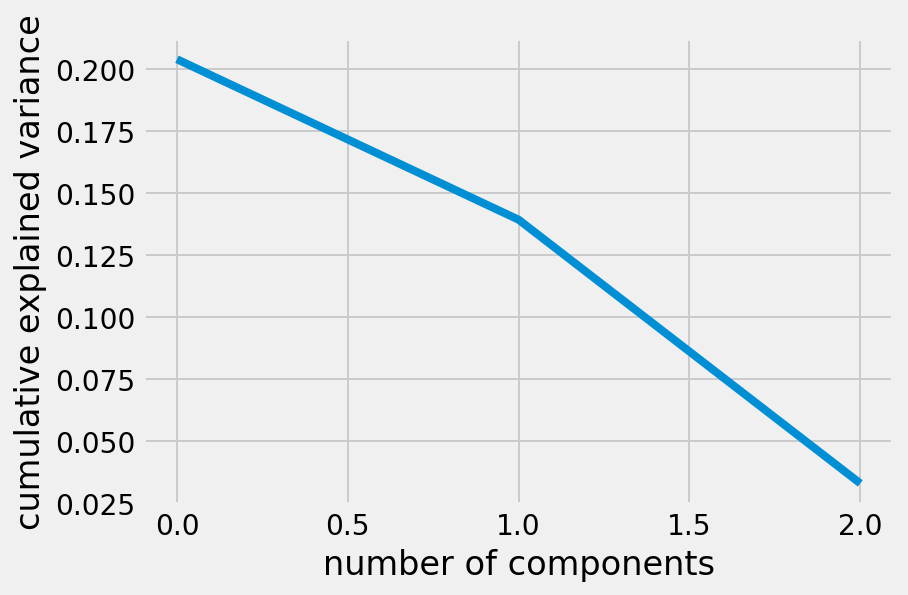

In [42]:
plt.plot(svd.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [51]:
from sklearn.cluster import KMeans
kmeans_kwargs = {
    "init": "random",
    "n_init": 15,
    "max_iter": 300,
    "random_state": 22,
}

# A list holds the SSE values for each k
sse = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

KeyboardInterrupt: 

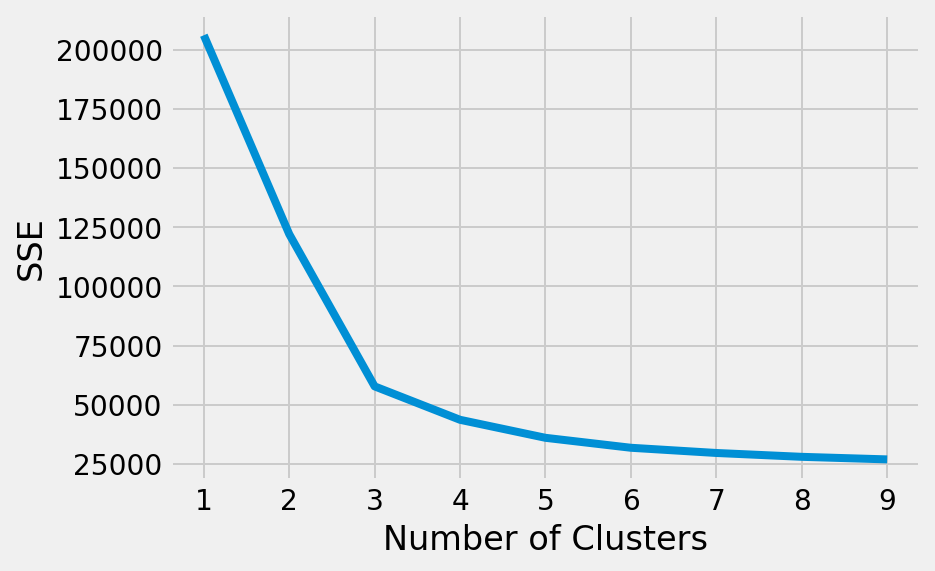

In [44]:
 plt.style.use("fivethirtyeight")
 plt.plot(range(1, 10), sse)
 plt.xticks(range(1, 10))
 plt.xlabel("Number of Clusters")
 plt.ylabel("SSE")
 plt.show()

### fit Kmeans

In [52]:
#fit Kmeans with k clusters
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3,n_init=15)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=15, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

### labels are named with integers and stored in the `labels_` attribute

In [53]:
km.labels_

array([1, 1, 1, ..., 1, 1, 1])

### take a look at one of the cluster results

In [54]:
# You should look at all the clusters, but let's look at cluster "15" (I chose this arbitrarily; you should look at all of them)

for i in range(0,len(km.labels_)):
    if km.labels_[i] == 1:
        print(raw_data['product_description'][i])
        print('**********')

Native Catch Salmon Bacon, Traditional flavor.  UPC 7 83583 27965 9.     Traditional Salmon Bacon is ground and seasoned skinless/boneless salmon, extruded, peppered, smoked, cooled and vacuum packed in 8 oz., 14 oz., and 5 lbs. clear vacuum bags.  Label states keep refrigerated or frozen".    
**********
Delish Fruit Burst 10 oz.(283 g)  Enjoy by: 8/28/12 Distributed by: Walgreen Co. 200 Wilmot Road, Deerfield, IL 60015 Distributed by Walgreens UPC 049022 55862 5
**********
Garden Pure Holiday Fruit Bowl 4 lbs (1.81kg) Best By: 8/28/12 and before   F& S Produce Co. Inc. Headquarters, Rosenhayn, NJ 08532      UPC 6 01172 00264 1
**********
Fresh Fruit Product is labeled in part:  "***Fresh Island Medley***1 LB (454g)***Best If Sold By***Ingredients:  Pineapple, Mango, Papaya.***Packed in its own juice***Distributed by:  Winn-Dixie Stores Inc. Jacksonville, FL 32254***For Nutrition Information Call 1-888-449-9386***P-009***0 21140 01696 6***PERISHABLE KEEP REFRIGERATED***"
**********
R

Fresh Whole Honey Dew Melons, packed in paper cartons labeled, Southeastern Growers Association, Fresh Melons. Individual melons were not labeled.
**********
Costa Whole Peeled Onions (Item #00841, #B841) 25 lb poly bag Packed by: Fresh Ideas Co., 18 Bunker Hill Industrial Park, Boston, MA 02129  Item # 00254
**********
Whole Fresh Cantaloupe, PLU# 4319, Burch Farms, Faison, NC 28341. On 8/2/2012 the recall was expanded to include cantaloupes labeled, Cottle Strawberry, Inc., #4319, Faison, NC. (Cottle Farms is not involved in this recall). 
**********
Dole Mushroom,  packaged in a retail package, net wt. 8 oz. The UPC is 0 33383 67600 5.
**********
Eat Smart Snap Peas, 14x2lbs, 6x8oz , 12x8oz.  Item # 18786, 22216, 10094, UPC 7 09351 00035 5, 7 09351 00901 3  
**********
) Wawa fruit & cheese Net Wt  6 OZ  Distributed by: Wawa, Inc. Wawa, PA 19063 wawa.com  On or before August 11; UPC 261902567  
**********
Finest Traditions Creamy Cheddar Macaroni , 8 lbs., 10 733147 10156 5
********

**********
#312 Seafood Pasta Salad	312	5 pounds  
**********
#802 Salad - No Meat Large Chef	3/4 pounds  #801 Salad - No Meat Small Chef   1/4 pound  
**********
#311 Fruit & Nut Wild Rice Salad	311	5 pounds  
**********
#371 Taco Layer Dip - 30 oz., #370 Taco Layer Dip, 15 oz.  
**********
Peanut Butter Fudge 3 oz bag, manufactured from 6-28-12 thru 9-20-12
**********
Archer Farms Layered Taco Dip Kits - Taco Dip, kit, 0 11 11596 36300 4       
**********
Gills Onions were used in this product.     The product listed below is prepared at Whole Foods Market and distributed in their retail chef's case or on the self-service bar. It was not sold labeled.    THREE BEAN SALAD
**********
Grandpas Potato Salad, 16 oz., 0 11596 14027 8; 8.2 lb., 0 11596 24227 9; 3 lb., 0 11596 34326 6; 5 lb., 0 11596 91026 0      
**********
Finest Traditions Garden Vegetable Spaghetti	8 lbs., 10 733147 10196 1  
**********
Garden-Fresh Bacon Mac & Cheddar Salad Kit 5.75  lbs.	0 11596 62209 5  
**********
Da

Fresh and Easy Creamy Cashew Butter, 16 oz, UPC 51379022525, produced for: Fresh and Easy Neighborhood Market, Inc, El Segundo, CA 80245.  Labeling is brown, white, and yellow with white, black, and yellow print writing.
**********
Sunland Organic Vanilla Cranberry Creamy Peanut Butter 375 g UPC 4868741325; 10 oz UPC 55813.
**********
Sprouts Farmers Market Creamy Peanut Butter, No Salt, 16 oz, UPC 7487500334, Manufactured Exclusively for Sprouts Farmers Market, Phoenix, Arizona 85028. 
**********
Natural Value Organic Creamy Peanut Butter with Salt, 15 lb, UPC 910039.
**********
Pierre Peanut Butter & Straw. Jam on White Bread, 2.80oz, AdvancePierre Foods, Inc., 9990 Princeton Glendale Road, Cincinnati, OH 45246.
**********
Peanut Butter & Jelly on Graham Wafers, 2.20oz., AdvancePierre Foods, Inc., 9990 Princeton Glendale Road, Cincinnati, OH 45246.
**********
Archer Farms Creamy Cashew Butter, 16 oz, UPC 8523920335, Distributed by TARGET Corporation Minneapolis, MN 55403.  Labeling i

Pierre Peanut Butter Jamwich & Banana on Whole Grain Bread, 2.80oz., AdvancePierre Foods, Inc., 9990 Princeton Glendale Road, Cincinnati, OH 45246.
**********
Tomme de Nena  Sizes could be 8oz packages, 1.5lbs packages, 3.5lbs packages, 7lbs packages, or 15lb wheel  Packaging could be vacuum packed bags, paper wrap, or plastic wrap
**********
Chocolate, confections. Bulk Peanut Butter Jewel, item number 096. 24 pieces per case.
**********
Chocolate, confections. Packaged in gift box cartons. 4-Piece Peanut Butter Truffles, item number 079. Labeling reads in part:"ALL NATURAL LadybuG Peanut Butter truffles*** www.XanConfections.com Distributed by: Xan Confections Irvine, CA 92614 U.S.A.***".    4 pieces in each gift box @ 12 in a case  total  48 pcs
**********
Clemmy's Brand Peanut Butter Chocolate Chip Ice Cream, Pint Size, 16 OZ (437mL), UPC 8 94509 00231 9. Labeling reads in part: "CLEMMY'S RICH AND CREAMY PEANUT BUTTER CHOCOLATE CHIP*** 100% SUGAR FREE LACTOSE FREE GLUTEN FREE, 16

**********
Item Number: 373703  Item Description: TUB LG ALMOND ROASTED N/SLT  Case Pack: 12  Package Size: 15 OZ 2-Piece Clear Plastic Tub (No Label on Top, Nutritional Label on Bottom)  UPC Number: 094776076116  
**********
7 Eleven brand Strawberry/Kiwi/Mango, 6 oz., UPC 0-52548-51979-7  
**********
ARO Pistachios, Inc.,  Pistachios roasted inshell - no salt; 25 lb bulk .
**********
Mother Earth Products, Veggie Burger, Textured Vegetable Protein, packaged in 2-cup mylar bags, 1-quart mylar bags, 1-quart plastic jar, 1-gallon mylar bags, 5-lb mylar bags, 15-lb bulk bag, 25-lb bulk box and TVP Variety Sample Pack.
**********
Apple Blend, generic, 16 oz., sold at Wal-Mart, UPC 7-17524-77626-6  
**********
Item Number: 357642  Item Description: TUB SM ALMOND WHOLE RAW  Case Pack: 12  Package Size: 10 OZ 2-Piece Clear Plastic Tub (No Label on Top, Nutritional Label on Bottom)  UPC Number: 760208107450  
**********
Trophy Nut Brand 1.5 oz. Red Pistachio Tube and Nut Barrel Brand 1.25 oz.

**********
Finest Traditions Mint Chocolate Mousse, Product Code 10 733147 11017 8	 	11/4/2013 - 11/18/2013	1/5 lb  
**********
Garden-Fresh Amish Country Macaroni Salad, Product Code 0 11596 52010 0, 2/5 lb;  
**********
Finest Traditions Krab Salad, Product Code 10 733147 10172 5		11/4/2013 - 11/11/2013	1/8 lb    Dairy Fresh Krab Salad , Product Code 0 70163 41001 5,	1/5 lb    
**********
Garden-Fresh American Potato Salad, Product Code 0 11596 51010 1, 2/5 lb.;   Garden-Fresh American Potato Salad,  Product Code 0 11596 14015 5, 12/16 oz.;  Garden-Fresh American Potato Salad,  Product Code 0 11596 24200 2, 7 8/2 lb. ;  Garden-Fresh American Potato Salad,  Product Code  0 11596 34310 5, 6/3 lb.;  Garden-Fresh Large Diced American Potato Salad,  Product Code 0 11596 91018 5	2/5 lb.      Market Pantry American Potato Salad,Product Code 0 85239 24102 8, 4/3 lb;  Market Pantry American Potato Salad, Product Code 0 85239 24107 3, 6/16 oz.;    Spartan American Potato Salad, Product Code 0 

**********
Reser's American Harvest BBQ Beans, Formula VE.18, packaged in  2/8-lb (UPC 071117141757) carton cases. Reser's Fine Foods, Inc., Beaverton, OR.
**********
FD's Potato Salad, Formula PO.182, packaged in 3/8-lb (UPC 071117116045) carton cases.  Reser's Fine Foods, Beaverton, OR.
**********
Potato Salad with Deviled Egg, Formula PO.16, packaged under these labels:    -Reser's Fine Foods, Deviled Egg Potato Salad, in 6/454-gm UPC 071117612523, 6/16-oz UPC 071117190380 and 2/8-lb UPC 071117002256 container cases. Reser's Fine Foods, Inc., Beaverton, OR.    -Dillons Deviled Egg Potato Salad, in 12/16-oz UPC 71117182576 and 6/32-oz UPC 071117182576 carton cases. Distributed by: Dillons Stores, Hutchinson, KS.    -Stonemill Kitchens (Sam's Club) Potato Salad with Deviled Egg, packaged in 6/4-lb carton cases.  UPC 071117615876 
**********
Walmart Deli Amish Potato Salad, Formula PO.120, packaged in 6/32-oz (UPC 681131917445), 12/16-oz (UPC 681131917469)and 6/4-lb (UPC 681131917049) 

**********
Reser's Homestyle Seashell Macaroni Salad, Formula MA.36 packaged in 2/8-lb carton cases. Reser's Fine Foods, Inc., Beaverton, OR.
**********
Reser's Chicken Salad Dressing, Formula DR.49B64, packaged in 5/4-lb (UPC 071117060355) carton cases. Reser's Fine Foods, Inc., Beaverton, OR.    *This is a bagged dressing that does not have a pre-printed label. Ingredient statement and code date information is ink jet printed onto the bags at the facility. As such, it is not for retail sale.
**********
Mrs. Giles Spiced Apples, Formula DEG01, packaged in 2/5-lb and 6/11-oz carton cases. Distributed by Reser's Fine Foods, Beaverton, OR.
**********
Garden-Fresh Spaghetti Salad, Product Code  0 11 11596 52130 1, 1/5 lb  
**********
Finest Traditions Creamy Country Cole Slaw,  10 733147 10140 4, 1/8 lb  
**********
Garden-Fresh Sweet And Sour Cucumber, Product Code  0 11596 52014 8	 	11/3/2013 - 11/10/2013	2/5 lb  
**********
Family Style Cole Slaw, Product Code 0 11596 53060 4 ,	2/5 lb;

Sprouts Farmers Market Organic Whole Black Peppercorns, 2.12oz., UPC Code 8-74875-00425-4, Lot Numbers 3287 and 3246.    Packaged in glass jars with plastic lid.    Product labeling reads in part:"SPROUTS FARMERS MARKET organic Black Peppercorns ***NET WT 2.12 OZ (60g)***Manufactured Exclusively For Sprouts Farmers Market Phoenix, Arizona 85028***www.sprouts.com***SP00056***8 74875 00425 4***".
**********
Pineapple Fruit Bar, 3 oz.,.  Also packaged in 9 oz. cup,  4 oz. HLT packaged for Canadian distribution and 4 pack 9 oz. cups.    Helados La Tapatia  Fresno, CA 93706
**********
Elote 9 oz cups      Helados La Tapatia  Fresno, CA 93706
**********
Pink Lemonade Fruit Bar,4 oz.,    Helados La Tapatia  Fresno, CA 93706
**********
Mamey  Milk Bars, 3 oz;  Also packaged in 9 oz. cups six pack.    Helados La Tapatia  Fresno, CA 93706
**********
Jamaica Fruit Bar, 3 oz.,.    Helados La Tapatia  Fresno, CA 93706
**********
Rice  Milk Bars, 3 oz;    Helados La Tapatia  Fresno, CA 93706
*******

**********
Lg. Fruit Crostata, 21 oz., UPC 20829300000;   Sm. Fruit Crostata, 7 oz., UPC 20829900000;   Lg. Nectarine Crostata, 21 oz., UPC 20823100000;   Sm. Nectarine Crostata, 6 oz.,  UPC 20832600000 
**********
Avocados, PLU#4770, size 32, 32 pcs/case. Packed in boxes with green, yellow, and red print with a black and white label.  
**********
Supreme Choice brand Super Lump, 16 oz;  Premium Pasteurized Crab Meat.  Product of Thailand.  Distributed by Supreme  Lobster and Seafood Company, Villa Park, IL 60181
**********
Supreme Choice brand Jumbo Lump, 16 oz;  Premium Pasteurized Crab Meat.  Product of Thailand.  Distributed by Supreme  Lobster and Seafood Company, Villa Park, IL 60181
**********
Raw, frozen, vacuum-packaged rock fish (portions, fillets, and whole fish, various sizes).  
**********
Navitas Naturals Organic Sprouted Chia Powder, 8 oz (227g) package;  Omega Fatty Acids, Protein, dietary Fiber.  UPC 858847000369;    Navitas Naturals,  Novato, CA 94949
**********
Olivi

Item Number 30590439.01, Kerry,  Brown Butter 30590439.01, Net WT 50 lb (22.68 KG),  Lot Number: 0416424102
**********
Mantequilla Hondurena (Honduran Style Butter Cream) in individually soft poly/plastic bags labeled in part: Lacteos Santa Martha Mantequilla Hondurena Honduran Style Cream Net WT 1 LB (16 oz)  
**********
Ham and Cheese Omelet on Toast, Net Wt. 5.25 oz., UPC 7-01248-01078-2, MFG Code 1793 
**********
Ham and Cheese Sub, Net Wt. 6.75 oz., UPC 7-01248-01109-3, MFG Code 1824
**********
Pecan cookie pieces packaged in 8 oz. (226 g) plastic bags under the Fisher brand.
**********
Chicken, Egg and Cheese Biscuit, Net. Wt. 6.10 oz., UPC 7-01248-01003-4, MFG Code 1712  
**********
Peach Cobbler, Net Wt. 5.10 oz. UPC 7-01248-00848-2, MFG Code 695
**********
French Toast w/Sausage, Net Wt. 4.00 oz., UPC 7-01248-00607-5, MFG Code 1506      
**********
Ham & Cheese on White, Net Wt. 3.00 oz., UPC 7-01248-00301-2, MFG Code 1034; Ham & Cheese on White, Net Wt. 3.80 oz., UPC 7-01248-

Maple Bacon ice cream; Bulk product is labeled with flavor name and date code, which is affixed to the plastic container (1, 1.5 and 3 gallon).
**********
Anvil ice cream; Bulk product is labeled with flavor name and date code, which is affixed to the plastic container (1, 1.5 and 3 gallon). 
**********
Rhubarb Sorbet; Gallon containers.  Bulk product is labeled with flavor name and date code, which is affixed to the plastic container (1, 1.5 and 3 gallon). 
**********
Pistachio Gelato; 5 liter plastic trays. Product is labeled with flavor name and production code. 
**********
Ginger Peach Blackberry Sorbet; Bulk product is labeled with flavor name and date code, which is affixed to the plastic container (1, 1.5 and 3 gallon).
**********
Vegan Coconut ice cream; Bulk product is labeled with flavor name and date code, which is affixed to the plastic container (1, 1.5 and 3 gallon).
**********
Pistachio ice cream; Bulk product is labeled with flavor name and date code, which is affixed t

**********
Blue Bell Ice Cream VANILLA FLAVORED NATURAL AND ARTIFICIAL FLAVOR ADDED 3 FL OZ (88mL) Institutional/food service tab cups
**********
Blue Bell No Sugar Added Lowfat Ice Cream Dutch Chocolate HALF GALLON (1.89L)
**********
Blue Bell Pecan Pralines 'n Cream One Pint (473 mL)
**********
- Private Reserve Rope Hung Smoked Scottish Salmon 4oz.    Products are packaged in Reduced Oxygen Package (ROP).  Product is priced per pound.    
**********
Blue Bell Ice Cream Happy Tracks 3 Gallon
**********
Blue Bell Light Ice Cream Cookies 'n Cream 25% fewer calories and 55% less fat than regular ice cream HALF GALLON (1.89L)
**********
DZ 3 oz. Autumn Twist Cup - Institutional Snack Item available on/around Thanksgiving
**********
Blue Bell Chocolate Peanut Butter One Pint (473 mL)
**********
Blue Bell Ice Cream I Heart Chocolate 3 Gallon
**********
Blue Bell Sherbet Rainbow Lime, Orange & Strawberry One Pint (473 mL)
**********
San Fernando Sunshine Mix: Gourmet Garage, 11 oz. Plastic 

**********
Blue Bell Ice Cream Red Velvet Cake Still a 1/2 Gal (2 QTS)
**********
Blue Bell Ice Cream Birthday Cake 3 Gallon
**********
Kroger Ground Cinnamon UPC 11110 70034 NEW WT. 18.3 oz Plastic container
**********
Fisher Brand chopped walnuts, packaged in 10 ounce, polyethylene stand-up bag with zipper. The bag is blue with white lettering. 
**********
Deep All Natural Spices Coriander Powder, Net Wt 400g/14.1 oz Product of India, Distributed by: Chetak New York, L.L.C. Edison, NJ 08837 USA
**********
Baby Bruddah's Chocolate Mac Nut Buttah.  12 oz. container, UPC 735182242040  Mahina Mele Farm,  Captain Cook, HI 96704    
**********
Blue Bell Ice Cream Caramel Turtle Fudge 3 Gallon
**********
DZ 3 oz. Strawberry Frozen Yogurt Cup - Institutional Snack Item 
**********
Blue Bell Ice Cream Black Walnut Still a 1/2 Gal (2 QTS)
**********
DZ 3 oz. Cherry Sundae Cup - Institutional Snack Item available on/around Valentine's Day
**********
Blue Bell Mocha Almond Fudge One Pint (473 mL

Roxbury Road Ice Cream Bucket, 362, Jeni's Splendid Ice Creams, LLC, 3 gallons, plastic bucket, individually packed, frozen.  Roxbury Road Ice Cream Pint Case, 262, Jeni's Splendid Ice Creams, LLC, pint size, plastic container, 8 pints per case, frozen.  Roxbury Road Ice Cream Pint, Jeni's Splendid Ice Creams, LLC, pint size, plastic container, individually packed, frozen.
**********
Passion Fruit Sorbet Pint Case, 289, Jeni's Splendid Ice Creams, LLC, pint size, plastic container, 8 pints per case, frozen.    Passion Fruit Sorbet Pint, Jeni's Splendid Ice Creams, LLC, pint size, plastic container, individually packed, frozen.    Passion Fruit Sorbet Pint Case, 289, Jeni's Splendid Ice Creams, LLC, pint size, plastic container, 8 pints per case, frozen.
**********
Cherries Kickapoo Ice Cream Bucket, 356, Jeni's Splendid Ice Creams, LLC, 3 gallons, plastic bucket, individually packed, frozen.    Cherries Kickapoo Ice Cream Pint Case, 256, Jeni's Splendid Ice Creams, LLC, pint size, plas

Braided String Cheese with Natural Hickory Smoke  Jumbo Braided String Cheese with Natural Hickory Smoke  5oz, 8lb    UPC Codes:  96252 00019 5, 7 96252 00020 1, 7 96252 00035 5,  7 96252 00015 7, 7 96252 00025 6, 7 96252 00041 6,  7 96252 00042 3, 7 96252 00040 9, 7 96252 00005 8,  7 96252 00008 9, 7 96252 00038 6, 7 96252 00028 7,  7 96252 00018 8, 7 96252 00013 3, 7 96252 00017 1,  7 96252 00016 4, 7 96252 00039 3, 7 96252 00022 5    Product is vacuum packed, packaged in plastic containers, or packed on styrofoam trays wrapped in plastic.
**********
Single Curry Chicken Salad Wrap, Made Right Here, 7oz  UPC 263126    
**********
Blue Raspberry Ice Bucket, 818, Jeni's Splendid Ice Creams, LLC, 3 gallons, plastic bucket, individually packed, frozen.    Blue Raspberry Ice Pint, Jeni's Splendid Ice Creams, LLC, pint size, plastic container, individually packed, frozen.  
**********
Cloverton Ice Cream Bucket, 351, Jeni's Splendid Ice Creams, LLC, 3 gallons, plastic bucket, individually 

**********
COMMERCIAL WHEAT GERM 274000, 50.00 lbs. (22.68 kg); UPC Code: 0-26938-46535-3
**********
Eillien's Salted Sunflower Kernels Net WT 4 oz (113G) sealed in original plastic packaging and contained in Garden Fresh Foods  Broccoli Raisin Salad Kit #2081, Net Wt 3.38 lbs, 1.53 kg, 0 00 11596 42081 3.
**********
Navitas Naturals Superfood Maca bar:  Sweet Maple, Maca, Nut Bar  Net WT. 1.4 oz/40 G.  Gluten free.    Ingredients:   Distributed by Navitas Naturals, Novato, CA.
**********
Kroger CRANBERRY DELIGHT TRAIL MIX NET WT 14 OZ  INGREDIENTS: DRIED CRANBERRIES ***ALMONDS, SUNFLOWER SEEDS*** UPC 0 11110 89869 2 DISTRIBUTED BY THE KROGER CO., CINCINNATI, OHIO 45202
**********
Ducktrap Smoked Mussels in both 6oz and 16oz Tubs
**********
Creative Snacks Brain Food, 3.5 oz. Snack Bag, UPC 816512015124, 10 lb. Bulk, UPC 816512013021, 9.5 oz. cup, UPC 855983002073; Fresh Market Brain Food, 25 lb. Bulk, UPC N/A, 9.5 oz. cup, UPC 737094218270,                                
**********
C

**********
Cafe Favorites  Oven Roasted Turkey Breast & Cheese Deli Flatz-IW  Code #C22348/22348
**********
Cafe Favorites  Italian Deli Flatz  Code #C22548/22548
**********
Integrated Food Service  Low Sodium, Reduced Fat   Chili Cheese Dog  Chicken Hot Dog with Chili & Cheese on a Whole Grain Hot Dog Bun  Code #C95200/952000  
**********
Integrated Food Service  Chicken Double Dogs  on Whole Grain Buns  Code #809021
**********
Cafe Favorites  5" Super Sub on a Whole Grain Hoagie-IW  Code #C02384/02384
**********
Integrated Food Service  All American Cheese Burger  Beef Patty and Cheese on a Whole Grain Bun  Code #471007/C47107-CH
**********
Integrated Food Service  Turkey Ham & Cheese Sandwich   on a Whole Grain Hawaiian Bun  Code #130018/C13018
**********
Integrated Food Service  All America Burger  Beef Patty on a Whole Grain Bun  Code #470007
**********
Cafe Favorites  Cold Cut Combo on a Whole Grain Knot Roll  Code #C02372/02372
**********
Integrated Food Service  Egg & Cheese Ba

ISLAND SOUPS, MANNISH WATER, NET WT. 16 OZ (28.4G)
**********
McConnell's Fine Ice Cream  Vanilla Bean
**********
PBJ w/Milk Meal Break, Item #61602
**********
Manila Sky Purple Yumm Ice Cream  16 oz.
**********
SOFiT Protein Plus Almonds Jalapeno Garlic, whole almonds covered by a crunchy protein shell:  NET WT. 1 OZ.
**********
Misty Fjord Maple Smoked Salmon, vacuum sealed 6 oz plastic packs.
**********
ISLAND SOUPS, RED PEAS SOUP NO MEAT, NET WT. 16 OZ (28.4G)
**********
Kuster's Dairy Foods Sliced Colby JackCheese, 5 lb. packages packed in plastic bags, keep refrigerated
**********
Agave Dream Cappuccino  1 Pint  UPC Code 8 9934900204 8
**********
UPC 411014937907,	Fresh Finds Dried Tropical Mix, Best By/Date Code: 3/17/2017 .          
**********
UPC 4130300137,  Essential Everyday Trail Mix Bars, Best By/Date Code: JAN 04 17.
**********
UPC 049022880641 Delish Blueberry Nut Blend Premium Trail Mix., Best By/Date Code:  3/17/2017.        
**********
OSSIE'S HONEY MUSTARD HERRING;

Snickerdoodle Cookie Dough 1041197 NET WT. 30 lb (13.61 kg), Aspen Hills, Inc. Garner, IA 50438 
**********
Cappuccino Supreme Chai Latte Net Wt. 2 lbs   American Instants, Inc. Flanders, NJ 07836
**********
Texas Kitchen Salads Tropical Fruit Supreme KEEP REFRIGERATED Nutrition Facts NET WT. 16 oz. in plastic containers, Packed By: Ron's Home Style Foods, Inc. Houston, TX 77021 UPC: 0 96938 84101 3
**********
Brownie Dough 04-371, NET WT. 30 lbs (13.61 Kg) Aspen Hills, Inc. Garner, IA 50438
**********
Quark, is sold by weight, both retail and wholesale, packaged in plastic cup for retail and in plastic bag for wholesale.
**********
Refrigerated, Ready to Eat Pacific Herring Fillet in Oil sold under the FRESH SEAFOOD label, packaged in a plastic retail containers (tub) Net Wt. 9.3 oz. (265g) - UPC 825512 110258, and Net Wt. 16.2 oz. (460g) - UPC 825512 110265 --- Manufactured by R.S.B. Staten Island, NY 10303
**********
Super Otirod. Product Code: T3188. 50 lb bags          
**********

**********
Marketside Grab and Go Col. Sharp Cheddar 10.8 oz Set Ups 
**********
artisanal cheese VULTO Creamery HANDMADE CHEESE, Miranda, NET WT. 0.5 lbs, 
**********
 Best Choice French Vanilla Instant Pudding & Pie Filling, UPC 0 70038 31221 5, Distributed by Associated Wholesale Grocers, INC, 3.4 oz.
**********
Butterscotch Drops - MB 1000 [or 4000] Count; NET WT: 50 LBS
**********
The Classic  Basket #6013
**********
Lasting Impression  Basket #531
**********
Cookie & Candy packaged in a 9"/16oz. (UPC 026138600000), 12" /32 oz. (UPC 026138700000),  and 16"/48 oz. (UPC 026138800000) plastic tray containers for retail sale, labeled with Hy-Vee scale ticket. The product was labeled HyVee West Des Moines, IA.
**********
Soureliette cheese, Net Wt 3.969 lb (case)/ Net Wt 1.323 lb per unit,  Item number 707116
**********
Original Cheddar Cheese Seasoning, #117059, Net Weight 1600 lbs. bulk tote
**********
Organic IQF Dark Sweet Cherries, 900 cartons per lot
**********
foxy's salted cara

**********
AUNT JEMIMA(R) 14 BUTTERMILK WAFFLES, NET WT 17.18oz UPC 019600062103
**********
French toast packaged as follows:  a) Hilltop HEARTH, FRENCH TOAST, 18 8 COUNT BAGS, NET WT 10 LB 11.2 OZ, UPC 075810861816  b) Hilltop HEARTH, FRENCH TOAST, 12 6 COUNT BAGS, NET WT 10 LB 11.2 OZ, UPC 075810843855  c) Hilltop HEARTH FRENCH TOAST, 12 6 COUNT BAGS, NET WT. 10 LB 11.2 OZ, UPC 075810843854  d) Mrs. Butter-worth's(R), FRENCH TOAST, 144 count, NET WT. 13.5, UPC 001960046003  
**********
Refrigerated, ready-to-eat, sliced, whole, split, hot SMOKED WHITEFISH in vacuum packages, labeled in part ,***  SMOKED WHITEFISH WHOLE *** -- KEEP REFRIGERATED 38 DEGREES F or Below --- THE SMOKEHOUSE OF NY , MAMARONECK , NY 10543
**********
Refrigerated, ready-to-eat, sliced, cold smoked, GRAVLAX SALMON, HAND SLICED PACKS, in 4 oz., 8 oz., & whole sides in vacuum packages, UPC  0200000608415 -- KEEP REFRIGERATED,  STORE AT 38 DEGREES F or Below --- THE SMOKEHOUSE OF NY,  MAMARONECK, NY 10543
********

Coconut Med Shred Toasted-Nat 70COCO02  
**********
Dates Chopped-Organic 70DATE11    
**********
Pumpkin Seed Kernel R&S SS 70PUMP07-A
**********
Apricot Diced L-Organic 70APRIC10
**********
Dates Whole Pitted 80DATE02-B    
**********
Broccoli/Cauliflower,  14 oz..  UPC 24220900000    Sold in Albertson's and Safeway Stores packed in clear plastic trays and cups.
**********
Mann's Family Favorites Brussels Sprouts, 12 oz bags;    UPC  716519010354 - Canada; also sold under Archer Farms 12 oz bag; Manns 2 lb
**********
Walmart Super Blend, 10oz bags  UPC 681131148368
**********
ASIAN PASTA SALAD Ingredients: Cooked Pasta, Broccoli, Green Onion, Red Onion, Bell Peppers, Cashews, Peanuts, Carrots, Red Cabbage and Asian Salad Dressing Contains: Wheat, Cashews, Peanuts, Soy
**********
Mann's Fiesta Vegetable Tray, 35.5 oz tray;  UPC -716519088728 - US;  UPC - 716519020490 - Canada
**********
Mann's Nourish Bowl Cauli Rice Curry, 11 oz Tray;  UPC -716519036897- US    UPC - 716519036903 - Ca

SPRINGFIELD SMOKED FISH Smoked Bluefish, catch weight UPC: 045049117357
**********
Meijer Sharable Waldorf Salad  16 Oz retail unit in plastic container	  UPC: 7-13733-53864-0	  4 retail containers per wholesale case        
**********
Smoked Salmon packed under Springfield Smoked Fish and Rachael's:   - Rachael s SPRINGFIELD SMOKED FISH HAND CUT STYLE SMOKED NOVA SALMON, 4 oz. UPC: 045049113342;   -  Rachael s SPRINGFIELD SMOKED FISH SMOKED SLICED NOVA SALMON, 4 oz., UPC: 045049113250; Rachael s SPRINGFIELD SMOKED FISH SMOKED SLICED NOVA SALMON 8 oz., UPC: 045049113083; Rachael s SPRINGFIELD SMOKED FISH SMOKED SLICED NOVA SALMON, 8 oz., UPC: 045049113274;   -  Rachael s SPRINGFIELD SMOKED FISH HAND CUT NOVA SALMON ATLANTIC SALMON 4 oz., UPC: 045049113359; Rachael s SPRINGFIELD SMOKED FISH HAND CUT STYLE SMOKED NOVA SALMON ATLANTIC SALMON 8 oz., UPC: 045049113304;  - Rachael s SPRINGFIELD SMOKED FISH SMOKED SLICED NOVA SALMON 1 lb., UPC: 811907018018 and SPRINGFIELD SMOKED FISH PRE-SLI